In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
from gmdhpy.gmdh import Regressor

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_predictions1(test, predicted):
    sns.set(style="whitegrid", font_scale=1.2)  # Set the style and font scale

    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    sns.lineplot(data=test, color='red', linewidth=2, label='Real SPI')

    # Plotting the predicted values
    sns.lineplot(data=predicted, color='blue', linewidth=2, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    sns.despine()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [5]:
import matplotlib.pyplot as plt

def plot_predictions2(test, predicted):
    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    plt.plot(test, color='red', linewidth=1.5, label='Real SPI')

    # Plotting the predicted values
    plt.plot(predicted, color='blue', linewidth=1.5, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [6]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real SPI')
    plt.plot(predicted, color='blue',label='Predicted SPI')
    plt.title('SPI Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('SPI')
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    print("The MSE is {}".format(mean_squared_error(test, predicted)))
    print("The MAE is {}".format(mean_absolute_error(test, predicted)))
    print("The R2_Score is {}".format(r2_score(test, predicted)))

In [7]:
# First, we get the data
dataset = pd.read_csv(r"wavelet_khariar.csv")
dataset.head()

,spi,Approximation,D 1,D 2,D 3,D 4,D 5,D 6
0,-0.35,0.21,-0.09,0.43,-1.12,-0.14,-0.04,0.08
1,-0.42,0.22,-0.11,0.36,-1.13,-0.08,-0.11,0.06
2,0.09,0.22,-0.22,0.22,-0.84,0.05,-0.16,0.05
3,0.78,0.22,-0.11,-0.05,-0.37,0.21,-0.16,0.06
4,1.13,0.22,0.10,-0.39,0.18,0.39,-0.09,0.09


In [9]:
X = dataset[['Approximation', 'D 1','D 3', 'D 4', 'D 5']].values  # Select the desired features
y = dataset.iloc[:, 0].values  # Target variable (SPI)


In [10]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate variables for the combined datasets
training_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
test_set = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
training_set

array([[ 0.08,  0.1 , -0.36, -0.02,  0.09, -0.35],
       [ 0.29,  0.17,  0.22, -0.23, -0.59,  0.14],
       [ 0.11, -0.57, -0.47, -0.05, -0.14, -0.81],
       ...,
       [ 0.  , -0.07, -0.86, -0.31, -0.07, -0.81],
       [ 0.09, -0.29,  0.39,  0.35,  0.1 ,  0.18],
       [ 0.25,  0.19,  1.16,  0.11,  0.07,  1.27]])

In [14]:
# # Checking for missing values
# training_set = dataset[:'2016'].iloc[:,1:2].values
# test_set = dataset['2017':].iloc[:,1:2].values

In [15]:
# # We have chosen 'High' attribute for prices. Let's see what it looks like
# dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
# dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
# plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
# plt.title('CSCO stock price')
# plt.show()

In [16]:
# # Scaling the training set
# sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# # print(training_set_scaled.shape)
# print(training_set.shape)
# print(test_set.shape)

In [17]:
# X_train = []
# y_train = []
# for i in range(60,training_set.shape[0]):
#     X_train.append(training_set[i-20:i,0])
#     y_train.append(training_set[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train.shape)
# print(y_train.shape)

In [18]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=5,
                      stop_train_epsilon_condition=0.00001,
                      layer_err_criterion='top',
                      l2=0.5,
                      verbose=1,
                      n_jobs='max')

In [19]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# # dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = X_train
# # print(inputs.shape)
# inputs = inputs.reshape(-1,1)
# print(inputs.shape)

# # print(inputs.shape)
# # inputs  = sc.transform(inputs)
# # print(inputs.shape)
# print(X_test.shape)

In [20]:
# Preparing X_test and predicting the prices
# X_test = []
# y_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-20:i,0])
#     y_test.append(inputs[i,0])
# X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_test.shape)
# print(y_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 5)
(392,)
(98, 5)
(98,)


In [21]:
gmdh.fit(X_train,y_train)

train layer0 in 3.63 sec
train layer1 in 0.11 sec
train layer2 in 0.10 sec
train layer3 in 0.11 sec
train layer4 in 0.12 sec
train layer5 in 0.11 sec
train layer6 in 0.12 sec
train layer7 in 0.13 sec
train layer8 in 0.10 sec
train layer9 in 0.09 sec
train layer10 in 0.11 sec
train layer11 in 0.10 sec
train layer12 in 0.10 sec
train layer13 in 0.11 sec
train layer14 in 0.09 sec
train layer15 in 0.21 sec
train layer16 in 0.10 sec
train layer17 in 0.09 sec
train layer18 in 0.11 sec
train layer19 in 0.11 sec
train layer20 in 0.15 sec
train layer21 in 0.22 sec
train layer22 in 0.10 sec
train layer23 in 0.15 sec
train layer24 in 0.11 sec
train layer25 in 0.13 sec
train layer26 in 0.11 sec
train layer27 in 0.11 sec


In [22]:
final_predictions = gmdh.predict(X_test)
print(final_predictions.shape)
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price.reshape(-1,1)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(98,)


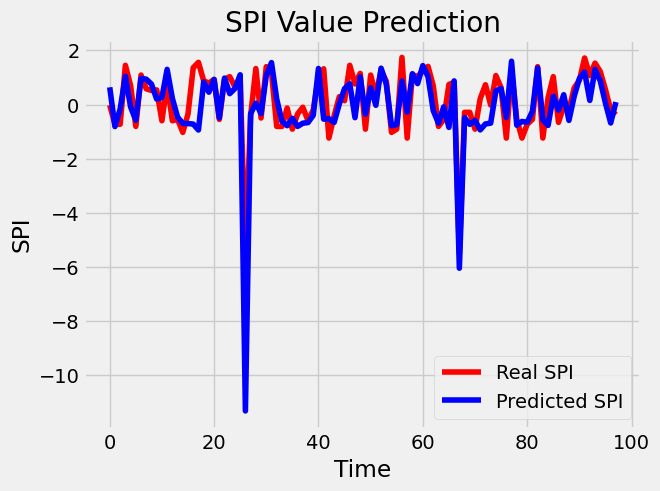

<Figure size 1600x400 with 0 Axes>

In [23]:
plot_predictions(y_test,final_predictions)

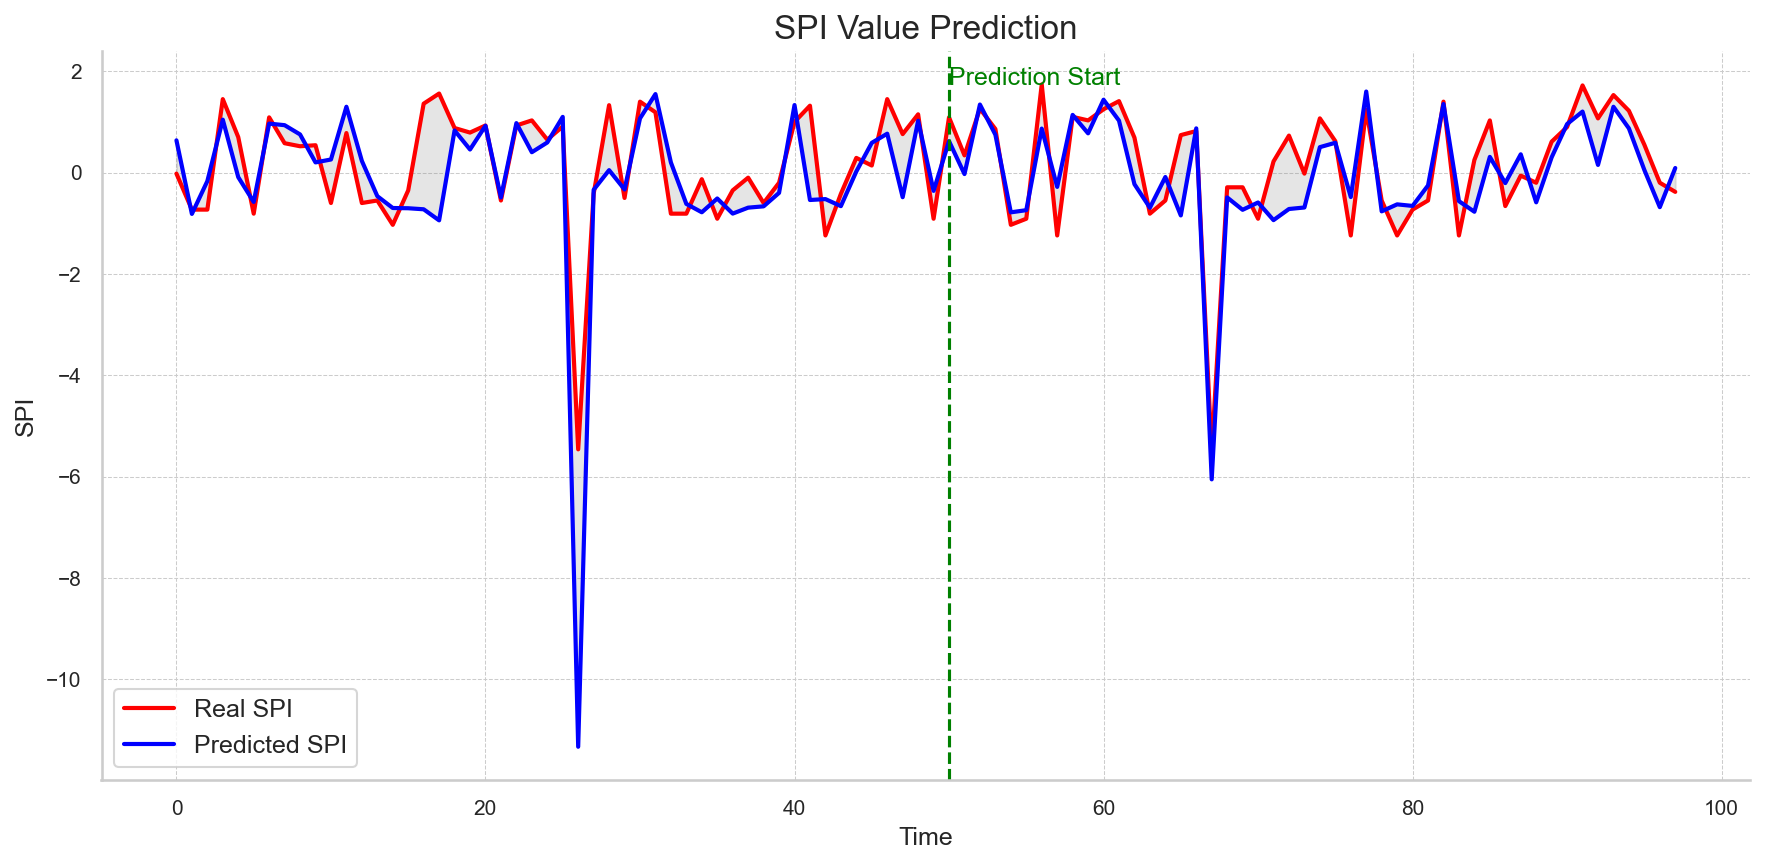

In [24]:
plot_predictions1(y_test,final_predictions)

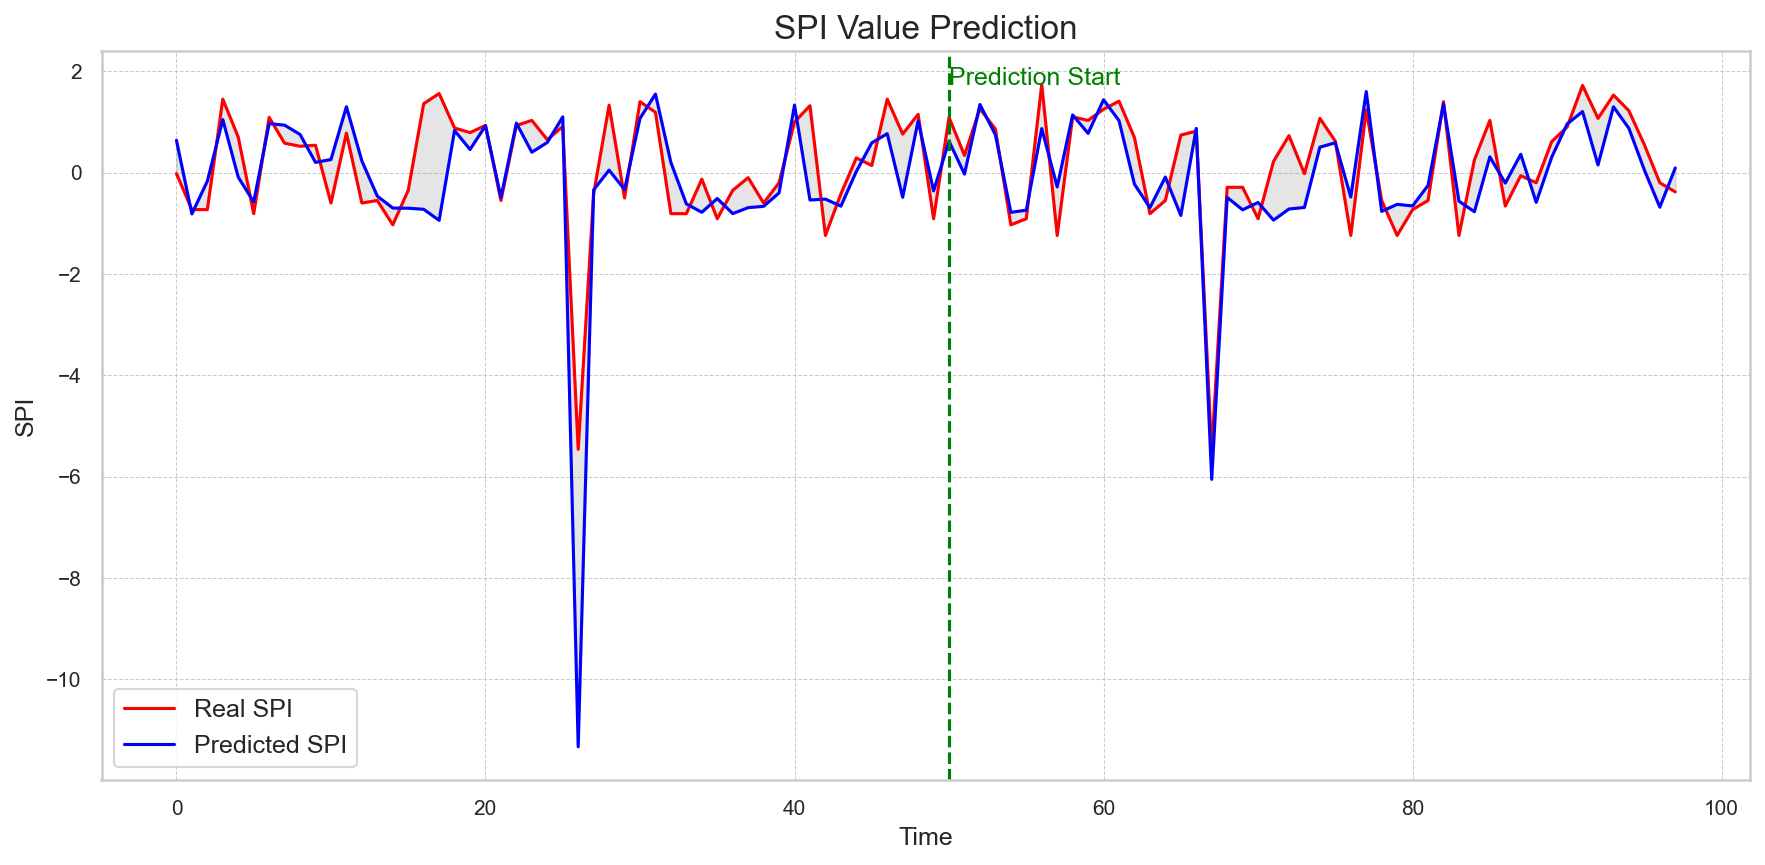

In [25]:
plot_predictions2(y_test,final_predictions)

In [26]:
return_rmse(y_test,final_predictions)

The root mean squared error is 0.8865307925106359.
The MSE is 0.7859368460695363
The MAE is 0.5445500275728332
The R2_Score is 0.4392756531933879


In [27]:
from sklearn.metrics import r2_score
y_test, final_predictions = list(y_test),list(final_predictions)
# gmdh.score(y_test, predicted_stock_price)
r2_score(y_test, final_predictions)

0.4392756531933879

In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [29]:
evaluation_metrics = calculate_evaluation_metrics(y_test, final_predictions)
print(evaluation_metrics)


{'ME': 0.217340721076976, 'MAE': 0.5445500275728332, 'MSE': 0.7859368460695363, 'RMSE': 0.8865307925106359, 'NRMSE': 0.12211167940917851, 'PBIAS': 154.67967077373748, 'RSR': 0.7488152955212735, 'rSD': 0.7259636733160629, 'NSE': 0.4392756531933879, 'mNSE': 0.4392756531933879, 'rNSE': 0.313399931478868, 'd': 0.8847260960391016, 'md': 0.8847260960391016, 'rd': 0.8847260960391016, 'cp': 0.8847260960391016, 'r': 0.8847260960391016, 'R2': 0.4392756531933879}


In [30]:
k=11
print(y_test[k],final_predictions[k])


0.78 1.2995383495908321


In [31]:
# # Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# # So for each element of training set, we have 60 previous training set elements 
# X_train = []
# y_train = []
# for i in range(60,2769):
#     X_train.append(training_set_scaled[i-60:i,0])
#     y_train.append(training_set_scaled[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [33]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=900,batch_size=32)

Epoch 1/900
13/13 [==============================] - 10s 12ms/step - loss: 1.0591
Epoch 2/900
13/13 [==============================] - 0s 14ms/step - loss: 1.0273
Epoch 3/900
13/13 [==============================] - 0s 15ms/step - loss: 0.9308
Epoch 4/900
13/13 [==============================] - 0s 15ms/step - loss: 0.8328
Epoch 5/900
13/13 [==============================] - 0s 14ms/step - loss: 0.7788
Epoch 6/900
13/13 [==============================] - 0s 14ms/step - loss: 0.7626
Epoch 7/900
13/13 [==============================] - 0s 16ms/step - loss: 0.7274
Epoch 8/900
13/13 [==============================] - 0s 13ms/step - loss: 0.6881
Epoch 9/900
13/13 [==============================] - 0s 13ms/step - loss: 0.6629
Epoch 10/900
13/13 [==============================] - 0s 16ms/step - loss: 0.6244
Epoch 11/900
13/13 [==============================] - 0s 17ms/step - loss: 0.5989
Epoch 12/900
13/13 [==============================] - 0s 19ms/step - loss: 0.5712
Epoch 13/900
13/13 [====

Epoch 101/900
13/13 [==============================] - 0s 18ms/step - loss: 0.3536
Epoch 102/900
13/13 [==============================] - 0s 13ms/step - loss: 0.3252
Epoch 103/900
13/13 [==============================] - 0s 14ms/step - loss: 0.3234
Epoch 104/900
13/13 [==============================] - 0s 13ms/step - loss: 0.3562
Epoch 105/900
13/13 [==============================] - 0s 13ms/step - loss: 0.3211
Epoch 106/900
13/13 [==============================] - 0s 14ms/step - loss: 0.3447
Epoch 107/900
13/13 [==============================] - 0s 14ms/step - loss: 0.3467
Epoch 108/900
13/13 [==============================] - 0s 15ms/step - loss: 0.3354
Epoch 109/900
13/13 [==============================] - 0s 13ms/step - loss: 0.3244
Epoch 110/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3178
Epoch 111/900
13/13 [==============================] - 0s 12ms/step - loss: 0.3494
Epoch 112/900
13/13 [==============================] - 0s 14ms/step - loss: 0.3312
Epoc

13/13 [==============================] - 0s 15ms/step - loss: 0.2720
Epoch 200/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2462
Epoch 201/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2680
Epoch 202/900
13/13 [==============================] - 0s 12ms/step - loss: 0.3056
Epoch 203/900
13/13 [==============================] - 0s 19ms/step - loss: 0.3299
Epoch 204/900
13/13 [==============================] - 0s 12ms/step - loss: 0.2509
Epoch 205/900
13/13 [==============================] - 0s 19ms/step - loss: 0.2885
Epoch 206/900
13/13 [==============================] - 0s 12ms/step - loss: 0.2629
Epoch 207/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2651
Epoch 208/900
13/13 [==============================] - 0s 12ms/step - loss: 0.3063
Epoch 209/900
13/13 [==============================] - 0s 15ms/step - loss: 0.2830
Epoch 210/900
13/13 [==============================] - 0s 29ms/step - loss: 0.2799
Epoch 211/900
13/1

13/13 [==============================] - 0s 16ms/step - loss: 0.2522
Epoch 298/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2482
Epoch 299/900
13/13 [==============================] - 0s 15ms/step - loss: 0.2692
Epoch 300/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2475
Epoch 301/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2494
Epoch 302/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2439
Epoch 303/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2622
Epoch 304/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2470
Epoch 305/900
13/13 [==============================] - 0s 21ms/step - loss: 0.2617
Epoch 306/900
13/13 [==============================] - 0s 20ms/step - loss: 0.2469
Epoch 307/900
13/13 [==============================] - 0s 18ms/step - loss: 0.2615
Epoch 308/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2456
Epoch 309/900
13/1

13/13 [==============================] - 0s 13ms/step - loss: 0.2271
Epoch 396/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2820
Epoch 397/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2630
Epoch 398/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2356
Epoch 399/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2393
Epoch 400/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2386
Epoch 401/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2393
Epoch 402/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2397
Epoch 403/900
13/13 [==============================] - 0s 12ms/step - loss: 0.2352
Epoch 404/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2359
Epoch 405/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2552
Epoch 406/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2376
Epoch 407/900
13/1

13/13 [==============================] - 0s 14ms/step - loss: 0.2329
Epoch 494/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2488
Epoch 495/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2246
Epoch 496/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2285
Epoch 497/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2284
Epoch 498/900
13/13 [==============================] - 0s 15ms/step - loss: 0.2325
Epoch 499/900
13/13 [==============================] - 0s 15ms/step - loss: 0.2231
Epoch 500/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2328
Epoch 501/900
13/13 [==============================] - 0s 12ms/step - loss: 0.2252
Epoch 502/900
13/13 [==============================] - 0s 15ms/step - loss: 0.2195
Epoch 503/900
13/13 [==============================] - 0s 14ms/step - loss: 0.2282
Epoch 504/900
13/13 [==============================] - 0s 13ms/step - loss: 0.2296
Epoch 505/900
13/1

13/13 [==============================] - 0s 18ms/step - loss: 0.2142
Epoch 592/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2696
Epoch 593/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2167
Epoch 594/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2038
Epoch 595/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2327
Epoch 596/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2042
Epoch 597/900
13/13 [==============================] - 0s 18ms/step - loss: 0.2241
Epoch 598/900
13/13 [==============================] - 0s 18ms/step - loss: 0.2166
Epoch 599/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2130
Epoch 600/900
13/13 [==============================] - 0s 18ms/step - loss: 0.2161
Epoch 601/900
13/13 [==============================] - 0s 17ms/step - loss: 0.2092
Epoch 602/900
13/13 [==============================] - 0s 16ms/step - loss: 0.2168
Epoch 603/900
13/1

13/13 [==============================] - 0s 18ms/step - loss: 0.1932
Epoch 690/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1936
Epoch 691/900
13/13 [==============================] - 0s 19ms/step - loss: 0.2256
Epoch 692/900
13/13 [==============================] - 0s 18ms/step - loss: 0.2105
Epoch 693/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1910
Epoch 694/900
13/13 [==============================] - 0s 23ms/step - loss: 0.2112
Epoch 695/900
13/13 [==============================] - 0s 20ms/step - loss: 0.2117
Epoch 696/900
13/13 [==============================] - 0s 19ms/step - loss: 0.2072
Epoch 697/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1940
Epoch 698/900
13/13 [==============================] - 0s 24ms/step - loss: 0.2129
Epoch 699/900
13/13 [==============================] - 0s 20ms/step - loss: 0.2535
Epoch 700/900
13/13 [==============================] - 0s 29ms/step - loss: 0.1931
Epoch 701/900
13/1

13/13 [==============================] - 0s 22ms/step - loss: 0.1618
Epoch 788/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1874
Epoch 789/900
13/13 [==============================] - 0s 22ms/step - loss: 0.1654
Epoch 790/900
13/13 [==============================] - 0s 21ms/step - loss: 0.1852
Epoch 791/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1625
Epoch 792/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1668
Epoch 793/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1800
Epoch 794/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1652
Epoch 795/900
13/13 [==============================] - 0s 29ms/step - loss: 0.1733
Epoch 796/900
13/13 [==============================] - 0s 27ms/step - loss: 0.1612
Epoch 797/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1684
Epoch 798/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1548
Epoch 799/900
13/1

13/13 [==============================] - 0s 28ms/step - loss: 0.1400
Epoch 886/900
13/13 [==============================] - 0s 24ms/step - loss: 0.1407
Epoch 887/900
13/13 [==============================] - 0s 21ms/step - loss: 0.1365
Epoch 888/900
13/13 [==============================] - 0s 24ms/step - loss: 0.1568
Epoch 889/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1307
Epoch 890/900
13/13 [==============================] - 0s 19ms/step - loss: 0.1308
Epoch 891/900
13/13 [==============================] - 0s 21ms/step - loss: 0.2057
Epoch 892/900
13/13 [==============================] - 0s 20ms/step - loss: 0.1336
Epoch 893/900
13/13 [==============================] - 0s 21ms/step - loss: 0.1397
Epoch 894/900
13/13 [==============================] - 0s 28ms/step - loss: 0.1383
Epoch 895/900
13/13 [==============================] - 0s 24ms/step - loss: 0.1407
Epoch 896/900
13/13 [==============================] - 0s 19ms/step - loss: 0.2378
Epoch 897/900
13/1

In [34]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)

In [35]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [36]:
predicted_spi = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_spi

4/4 [==============================] - 6s 6ms/step


array([[ 0.9852083 ],
       [-0.592225  ],
       [-0.19147924],
       [ 1.0714693 ],
       [ 0.03767496],
       [-0.593843  ],
       [ 0.89589036],
       [ 1.2978381 ],
       [ 1.1670884 ],
       [ 0.39261693],
       [ 0.63447654],
       [ 1.169195  ],
       [ 0.05889246],
       [-0.6595595 ],
       [-0.48966792],
       [-0.4383904 ],
       [-0.40204844],
       [-0.51548696],
       [ 1.1638216 ],
       [ 0.19199926],
       [ 1.2318558 ],
       [-0.3417482 ],
       [ 1.2095197 ],
       [ 0.86779165],
       [ 0.8249072 ],
       [ 1.302255  ],
       [-5.203696  ],
       [-0.13741803],
       [ 0.1583198 ],
       [-0.45219532],
       [ 1.3502679 ],
       [ 1.2238905 ],
       [ 0.10835145],
       [-0.71734345],
       [-0.45346424],
       [-0.5942484 ],
       [-0.365139  ],
       [-0.5225996 ],
       [-0.79446554],
       [-0.3051045 ],
       [ 1.3124602 ],
       [-0.5623789 ],
       [-0.6785439 ],
       [-0.23483136],
       [ 0.38329837],
       [ 0

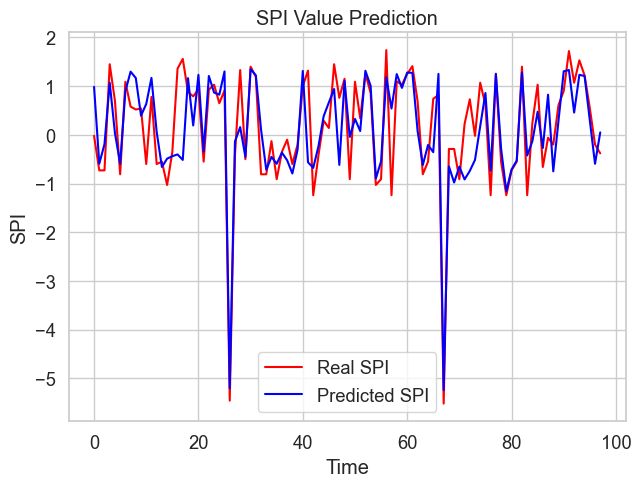

<Figure size 1600x400 with 0 Axes>

In [37]:
# Visualizing the results for LSTM
plot_predictions(y_test,predicted_spi)

In [38]:
# Evaluating our model
return_rmse(y_test,predicted_spi)

The root mean squared error is 0.632345529221428.
The MSE is 0.3998608683263278
The MAE is 0.4605625066510877
The R2_Score is 0.7147204316388959


In [39]:
evaluation_metrics = calculate_evaluation_metrics(y_test, predicted_spi)
print(evaluation_metrics)

{'ME': 0.04325065298500108, 'MAE': 0.4605625066510877, 'MSE': 0.3998608683263278, 'RMSE': 0.632345529221428, 'NRMSE': 0.08709993515446667, 'PBIAS': 30.781147367684145, 'RSR': 0.5341156881810384, 'rSD': 1.3560164885466552, 'NSE': -179.331299876229, 'mNSE': -179.331299876229, 'rNSE': -127.94339200147701, 'd': 0.35293263406181097, 'md': 0.35293263406181097, 'rd': 0.35293263406181097, 'cp': 0.35293263406181097, 'r': 0.35293263406181097, 'R2': 0.7147204316388959}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [51]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=1000,batch_size=86)

Epoch 1/1000


C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 8s 16ms/step - loss: 1.0404
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 1.0294
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 1.0064
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.9669
Epoch 5/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.9207
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.8521
Epoch 7/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.7789
Epoch 8/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.7006
Epoch 9/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6672
Epoch 10/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.7008
Epoch 11/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6747
Epoch 12/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6820
Epoch 13/1000
5/5 [==============================]

5/5 [==============================] - 0s 15ms/step - loss: 0.5511
Epoch 103/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5840
Epoch 104/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5725
Epoch 105/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5526
Epoch 106/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.5508
Epoch 107/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5454
Epoch 108/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5698
Epoch 109/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.5751
Epoch 110/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.5699
Epoch 111/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.5700
Epoch 112/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5819
Epoch 113/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5772
Epoch 114/1000
5/5 [===========

5/5 [==============================] - 0s 16ms/step - loss: 0.4834
Epoch 203/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4607
Epoch 204/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4355
Epoch 205/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4710
Epoch 206/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4421
Epoch 207/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4406
Epoch 208/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4377
Epoch 209/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4432
Epoch 210/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4640
Epoch 211/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4659
Epoch 212/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4559
Epoch 213/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4544
Epoch 214/1000
5/5 [===========

5/5 [==============================] - 0s 17ms/step - loss: 0.4018
Epoch 303/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3916
Epoch 304/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4030
Epoch 305/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3912
Epoch 306/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3937
Epoch 307/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3548
Epoch 308/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3739
Epoch 309/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3850
Epoch 310/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3533
Epoch 311/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3958
Epoch 312/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3804
Epoch 313/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3491
Epoch 314/1000
5/5 [===========

5/5 [==============================] - 0s 16ms/step - loss: 0.3702
Epoch 403/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3411
Epoch 404/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3196
Epoch 405/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3272
Epoch 406/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3371
Epoch 407/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3882
Epoch 408/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3990
Epoch 409/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3274
Epoch 410/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.3392
Epoch 411/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3636
Epoch 412/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3532
Epoch 413/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3316
Epoch 414/1000
5/5 [===========

5/5 [==============================] - 0s 15ms/step - loss: 0.3097
Epoch 503/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3420
Epoch 504/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3229
Epoch 505/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3472
Epoch 506/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3345
Epoch 507/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3295
Epoch 508/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3147
Epoch 509/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3204
Epoch 510/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3014
Epoch 511/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3226
Epoch 512/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.3444
Epoch 513/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3675
Epoch 514/1000
5/5 [===========

5/5 [==============================] - 0s 15ms/step - loss: 0.3185
Epoch 603/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3066
Epoch 604/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3048
Epoch 605/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3270
Epoch 606/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3011
Epoch 607/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3474
Epoch 608/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3081
Epoch 609/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3215
Epoch 610/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3492
Epoch 611/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3183
Epoch 612/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.3092
Epoch 613/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3204
Epoch 614/1000
5/5 [===========

5/5 [==============================] - 0s 19ms/step - loss: 0.3210
Epoch 703/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3150
Epoch 704/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3017
Epoch 705/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3002
Epoch 706/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3069
Epoch 707/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.3087
Epoch 708/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.3010
Epoch 709/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.3065
Epoch 710/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.3150
Epoch 711/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.3075
Epoch 712/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.3185
Epoch 713/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.2983
Epoch 714/1000
5/5 [===========

5/5 [==============================] - 0s 24ms/step - loss: 0.3044
Epoch 803/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.3068
Epoch 804/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.2781
Epoch 805/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3023
Epoch 806/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.2912
Epoch 807/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.2879
Epoch 808/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.2938
Epoch 809/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.2978
Epoch 810/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.3319
Epoch 811/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.3204
Epoch 812/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.2927
Epoch 813/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.3110
Epoch 814/1000
5/5 [===========

5/5 [==============================] - 0s 21ms/step - loss: 0.2880
Epoch 903/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.3088
Epoch 904/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2945
Epoch 905/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.2670
Epoch 906/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.2801
Epoch 907/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.2920
Epoch 908/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.3019
Epoch 909/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.2940
Epoch 910/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.2893
Epoch 911/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2987
Epoch 912/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2796
Epoch 913/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.3029
Epoch 914/1000
5/5 [===========

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [52]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_spi = regressorGRU.predict(X_test)
# GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
GRU_predicted_spi

4/4 [==============================] - 1s 5ms/step


array([[ 0.8844575 ],
       [-0.5721005 ],
       [-0.10634814],
       [ 1.2980609 ],
       [-0.08576378],
       [-0.39906678],
       [ 0.89855963],
       [ 0.9512309 ],
       [ 1.1115456 ],
       [ 0.52525544],
       [ 0.43793735],
       [ 1.1687112 ],
       [ 0.34637657],
       [-0.2831361 ],
       [-0.3659815 ],
       [-0.5664893 ],
       [-0.77444315],
       [-0.33337444],
       [ 1.0182954 ],
       [ 0.2192829 ],
       [ 1.135129  ],
       [-0.29063287],
       [ 1.2587515 ],
       [ 0.56828153],
       [ 1.0577897 ],
       [ 1.2163589 ],
       [-5.1188498 ],
       [ 0.03557666],
       [ 0.0281086 ],
       [-0.29980838],
       [ 1.3161712 ],
       [ 1.2624159 ],
       [ 0.15085821],
       [-0.5257547 ],
       [-0.5685428 ],
       [-0.38503942],
       [-0.5445233 ],
       [-0.5974561 ],
       [-0.12663063],
       [-0.18007167],
       [ 1.2005951 ],
       [-0.53844655],
       [-0.5903366 ],
       [-0.43000895],
       [ 0.14008977],
       [ 0

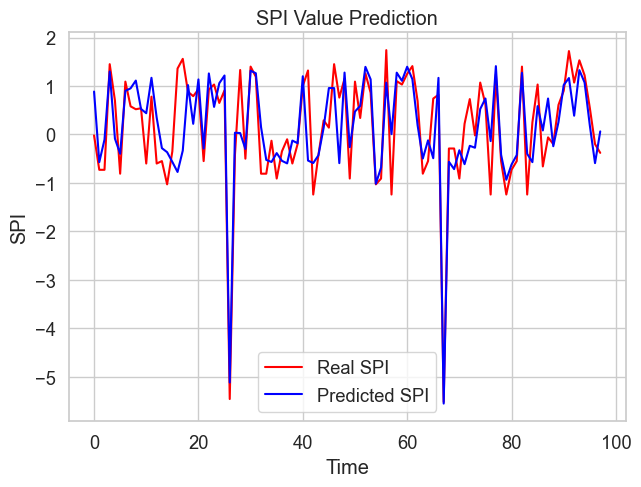

<Figure size 1600x400 with 0 Axes>

In [53]:
# Visualizing the results for GRU
plot_predictions(y_test,GRU_predicted_spi)

In [54]:
# Evaluating GRU
return_rmse(y_test,GRU_predicted_spi)

The root mean squared error is 0.6285331043327635.
The MSE is 0.39505386324218056
The MAE is 0.47517701714014526
The R2_Score is 0.7181499753730829


In [55]:
evaluation_metrics = calculate_evaluation_metrics(y_test, GRU_predicted_spi)
print(evaluation_metrics)

{'ME': 0.0056540187950037, 'MAE': 0.47517701714014526, 'MSE': 0.39505386324218056, 'RMSE': 0.6285331043327635, 'NRMSE': 0.08657480775933382, 'PBIAS': 4.023920420554552, 'RSR': 0.5308954931311031, 'rSD': 1.3466030872715604, 'NSE': -176.7095428433029, 'mNSE': -176.7095428433029, 'rNSE': -126.0729071054895, 'd': 0.3437436381633474, 'md': 0.3437436381633474, 'rd': 0.3437436381633474, 'cp': 0.3437436381633474, 'r': 0.3437436381633474, 'R2': 0.7181499753730829}
